In [3]:
from pyrosm import OSM, get_data
import pandas as pd
pd.options.mode.chained_assignment = None

In [26]:
df = pd.read_csv("/Users/alexander.girardet/Code/Personal/projects/rightmove_project/src/data_processing/beam/resources/data/London_pois.csv")

In [4]:
fp = "/Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/bedfordshire-latest.osm.pbf"
osm = OSM(fp)

# my_filter={"shop":['convenience', 'clothes', 'supermarket', 'books', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery'], "amenity": ["bank", "school", "restaurant", "cafe", "library",  "bar", "cinema", "park", "arts_center", "theatre"],
#           "leisure": ["park"]}
# pois = osm.get_pois(custom_filter=my_filter)

to_keep = ['restaurant', 'cafe', 'convenience', 'clothes', 'supermarket', 'bank', 'school', 'books', 'library', 'bar', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery', 'cinema', 'park', 'arts_center', 'theatre']


In [6]:
df = osm.get_boundaries()

<Axes: >

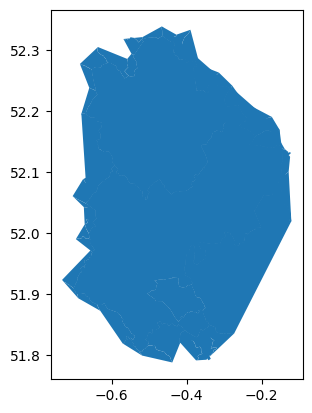

In [11]:
df.plot()

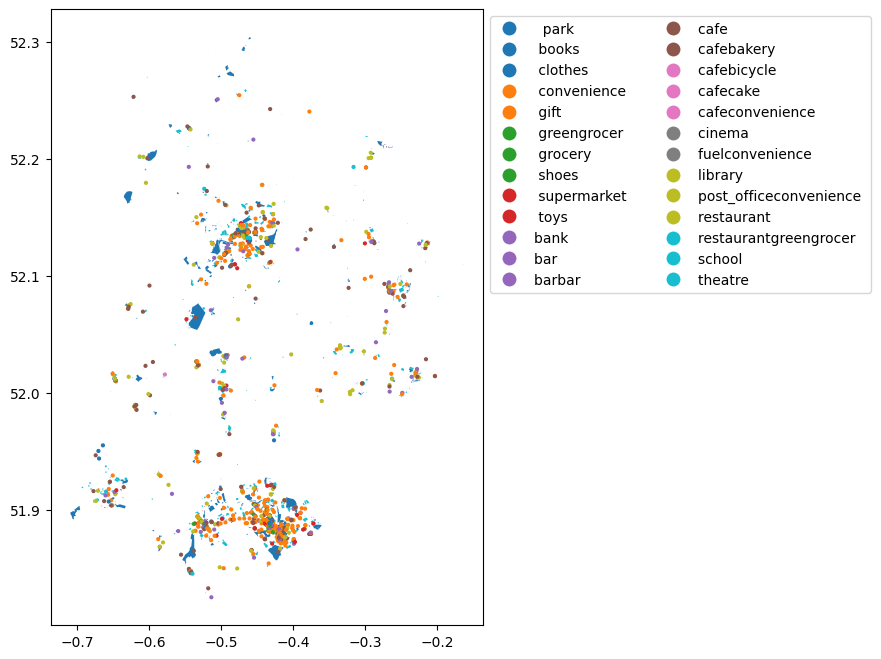

In [32]:
# Merge poi type information into a single column
pois["shop"] = pois["shop"].fillna(' ')
pois["amenity"] = pois["amenity"].fillna(' ')
pois["leisure"] = pois["leisure"].fillna(' ')
pois["poi_type"] = pois["amenity"] + pois["shop"] + pois["leisure"]

# Plot
ax = pois.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))


In [34]:
to_keep = ['restaurant', 'cafe', 'convenience', 'clothes', 'supermarket', 'bank', 'school', 'books', 'library', 'bar', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery', 'cinema', 'park', 'arts_center', 'theatre']


pois['poi_type_clean'] = pois['poi_type'].apply(lambda x: x.strip())

points_to_keep = pois[pois['poi_type_clean'].isin(to_keep)]

In [35]:

points_to_keep['geometry'] = points_to_keep.geometry.centroid

/var/folders/6d/8tvwdn1n6j924gfrc5bg5h5rsn3bgj/T/ipykernel_7879/622514318.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points_to_keep['geometry'] = points_to_keep.geometry.centroid


In [36]:

df = points_to_keep[['geometry', 'poi_type_clean']]

In [37]:
amenities = {
    "grocery": ['convenience', 'supermarket', 'greengrocer', 'grocery'],
    "restaurants": ['restaurant', 'bar', 'clothes'],
    "shopping": ['toys', 'shoes', 'gift'],
    "coffee": ['cafe'],
    "banks": ['bank'],
    "parks": ['park'],
    "schools": ['school'],
    "books": ['books', 'library'],
    "entertainment": ['cinema', 'theatre'],
    }

amenity_weights = {
"grocery": [3],
"restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
"shopping": [.5, .45, .4, .35, .3],
"coffee": [1.25, .75],
"banks": [1],
"parks": [1],
"schools": [1],
"books": [1],
"entertainment": [1],
}

def group_amenities(amenity):
    for key, values in amenities.items():
        if amenity in values:
            return key

df['amenities'] = df['poi_type_clean'].apply(group_amenities)

In [40]:
from math import radians


df['lon'] = df['geometry'].x
df['lat'] = df['geometry'].y

df['lon_rad'] = df['lon'].apply(lambda x: radians(x))
df['lat_rad'] = df['lat'].apply(lambda x: radians(x))

In [45]:
df = df.drop(columns=['geometry'])

In [50]:
output = df.to_parquet("data/bedfordshire-latest.parquet")

In [51]:
output

In [47]:
test_df = pd.read_parquet("data/bedfordshire-latest.parquet")

In [48]:
test_df

,poi_type_clean,amenities,lon,lat,lon_rad,lat_rad
0,restaurant,restaurants,-0.492195,52.160206,-0.008590,0.910367
2,restaurant,restaurants,-0.444455,52.133114,-0.007757,0.909894
3,supermarket,grocery,-0.438652,52.148682,-0.007656,0.910166
4,bar,restaurants,-0.491918,52.124073,-0.008586,0.909737
5,convenience,grocery,-0.459390,52.143425,-0.008018,0.910074
...,...,...,...,...,...,...
2244,park,parks,-0.517314,52.220082,-0.009029,0.911412
2245,park,parks,-0.529249,51.940952,-0.009237,0.906541
2246,school,schools,-0.464185,52.142625,-0.008102,0.910060
2247,school,schools,-0.460912,52.132621,-0.008044,0.909886


In [101]:
from math import radians

def load_county(DATA_LOCATION, county_file):
    fp = DATA_LOCATION + county_file
    print(f"loading data from {fp}")
    
    osm = OSM(fp)
    
    my_filter={"shop":['convenience', 'clothes', 'supermarket', 'books', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery'], "amenity": ["bank", "school", "restaurant", "cafe", "library",  "bar", "cinema", "park", "arts_center", "theatre"],
              "leisure": ["park"]}
    pois = osm.get_pois(custom_filter=my_filter)

    print(f"Loaded data from {fp}")

    return pois

def process_county(pois_df):
    to_keep = ['restaurant', 'cafe', 'convenience', 'clothes', 'supermarket', 'bank', 'school', 'books', 'library', 'bar', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery', 'cinema', 'park', 'arts_center', 'theatre']
    
    pois_df["shop"] = pois_df["shop"].fillna(' ')
    pois_df["amenity"] = pois_df["amenity"].fillna(' ')
    pois_df["leisure"] = pois_df["leisure"].fillna(' ')
    pois_df["poi_type"] = pois_df["amenity"] + pois_df["shop"] + pois_df["leisure"]

    pois_df['poi_type_clean'] = pois_df['poi_type'].apply(lambda x: x.strip())

    points_to_keep = pois_df[pois_df['poi_type_clean'].isin(to_keep)]

    points_to_keep_reprojected = points_to_keep.to_crs('EPSG:3857') 

    # Calculate centroids on the re-projected GeoDataFrame
    points_to_keep_reprojected['geometry'] = points_to_keep_reprojected.geometry.centroid

    # Optional: Reproject centroids back to the original CRS (EPSG:4326)
    centroids_geo_crs = points_to_keep_reprojected.to_crs('EPSG:4326')

    df = centroids_geo_crs[['geometry', 'poi_type_clean']]

    print("Processed county")

    return df

def group_amenities(amenity):
    for key, values in amenities.items():
        if amenity in values:
            return key

def process_amenities(df):
    amenities = {
    "grocery": ['convenience', 'supermarket', 'greengrocer', 'grocery'],
    "restaurants": ['restaurant', 'bar', 'clothes'],
    "shopping": ['toys', 'shoes', 'gift'],
    "coffee": ['cafe'],
    "banks": ['bank'],
    "parks": ['park'],
    "schools": ['school'],
    "books": ['books', 'library'],
    "entertainment": ['cinema', 'theatre'],
    }

    amenity_weights = {
    "grocery": [3],
    "restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
    "shopping": [.5, .45, .4, .35, .3],
    "coffee": [1.25, .75],
    "banks": [1],
    "parks": [1],
    "schools": [1],
    "books": [1],
    "entertainment": [1],
    }

    df['amenities'] = df['poi_type_clean'].apply(group_amenities)

    return df

def process_coordinates(df):
    df['lon'] = df['geometry'].x
    df['lat'] = df['geometry'].y
    
    df['lon_rad'] = df['lon'].apply(lambda x: radians(x))
    df['lat_rad'] = df['lat'].apply(lambda x: radians(x))
    df = df.drop(columns=['geometry'])

    return df

def process_dataset(county_file):

    DATA_LOCATION = "/Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/"

    county_name = county_file.split(".osm")[0]

    print(f"Processing data for {county_name}")
    
    raw_df = load_county(DATA_LOCATION, county_file)

    raw_df.to_parquet(f"data/raw/{county_name}.parquet")

    print(f"Loaded raw dataset to location: data/raw/{county_name}.parquet")
    
    processed_df = process_county(raw_df)
    processed_df = process_amenities(processed_df)
    processed_df = process_coordinates(processed_df)
    
    processed_df.to_parquet(f"data/processed/{county_name}.parquet")
    print("Loaded processed dataset to location")

    return df
        

In [89]:
import os

DATA_LOCATION = "/Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/"

files = os.listdir(DATA_LOCATION)

In [90]:
raw_df = load_county(DATA_LOCATION, files[0])

loading data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/west-yorkshire-latest.osm.pbf
Loaded data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/west-yorkshire-latest.osm.pbf


In [100]:
files[0].split(".osm")[0]

'west-yorkshire-latest'

In [86]:
processed_df = process_county(raw_df, target_crs)

Processed county


In [91]:
l_df = process_amenities(processed_df)

In [93]:
u_Df = process_coordinates(l_df)

In [103]:
df = process_dataset(files[2])

Processing data for worcestershire-latest
loading data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/worcestershire-latest.osm.pbf
Loaded data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/worcestershire-latest.osm.pbf
Loaded raw dataset to location: data/raw/worcestershire-latest.parquet
Processed county
Loaded processed dataset to location


In [105]:
df = pd.read_parquet("data/processed/worcestershire-latest.parquet")

In [ ]:
for file in files:
    df = process_dataset(file)

## Test

In [120]:
df_1 = pd.read_parquet("data/processed/rutland-latest.parquet")

In [115]:
df = pd.read_csv("/Users/alexander.girardet/Code/Personal/projects/rightmove_project/notebooks/data_processing/data/processed/London_pois.csv")

In [118]:
df = df.drop(columns=["Unnamed: 0", "geometry"])

/Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/wales-latest.osm.pbf

In [136]:
df = process_dataset("wales-latest.osm.pbf")

Processing data for wales-latest
loading data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/wales-latest.osm.pbf
Loaded data from /Users/alexander.girardet/Code/Personal/projects/rightmove_project/data/wales-latest.osm.pbf
Loaded raw dataset to location: data/raw/wales-latest.parquet
Processed county
Loaded processed dataset to location


In [127]:
combined_data = pd.DataFrame()

df = pd.read_parquet("data/processed/rutland-latest.parquet")


AttributeError: 'DataFrame' object has no attribute 'append'

In [137]:
dfs = []

for file in os.listdir("data/processed/"):
    df = pd.read_parquet(f"data/processed/{file}")
    print(file)
    dfs.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)

tyne-and-wear-latest.parquet
cambridgeshire-latest.parquet
suffolk-latest.parquet
oxfordshire-latest.parquet
northumberland-latest.parquet
berkshire-latest.parquet
gloucestershire-latest.parquet
leicestershire-latest.parquet
cumbria-latest.parquet
rutland-latest.parquet
wales-latest.parquet
somerset-latest.parquet
kent-latest.parquet
nottinghamshire-latest.parquet
scotland-latest.parquet
east-sussex-latest.parquet
lancashire-latest.parquet
north-yorkshire-latest.parquet
staffordshire-latest.parquet
hampshire-latest.parquet
isle-of-wight-latest.parquet
merseyside-latest.parquet
bedfordshire-latest.parquet
west-sussex-latest.parquet
south-yorkshire-latest.parquet
norfolk-latest.parquet
east-yorkshire-with-hull-latest.parquet
cheshire-latest.parquet
west-yorkshire-latest.parquet
northamptonshire-latest.parquet
worcestershire-latest.parquet
essex-latest.parquet
west-midlands-latest.parquet
warwickshire-latest.parquet
wiltshire-latest.parquet
durham-latest.parquet
lincolnshire-latest.parque

In [140]:
combined_df.to_parquet("UK_pois.parquet")